# Кластеризація Частина 1: Методи розбиття

## Вступ до кластеризації

### Що таке кластеризація?

**Кластеризація** - це техніка **навчання без вчителя**, яка групує подібні точки даних разом без знання "правильних" відповідей заздалегідь. На відміну від класифікації, де ми маємо розмічені приклади для навчання, кластеризація шукає патерни та структури в даних.

### Проблема кластеризації

Дано набір даних з $n$ точками даних, кластеризація прагне:
- Розбити дані на $k$ груп (кластерів)
- Максимізувати схожість всередині кластерів (внутрішньокластерна схожість)
- Мінімізувати схожість між кластерами (міжкластерна несхожість)

### Ключові характеристики хороших кластерів

1. **Висока внутрішньокластерна схожість**: Точки в одному кластері повинні бути подібними
2. **Низька міжкластерна схожість**: Точки з різних кластерів повинні бути несхожими
3. **Добре розділені**: Кластери повинні бути чіткими та непересічними
4. **Значущі**: Кластери повинні представляти значущі групи в контексті проблеми

### Застосування у реальному світі

| Предметна область | Приклади використання |
|-------------------|----------------------|
| **Маркетинг** | Сегментація клієнтів, дослідження ринку |
| **Біологія** | Аналіз експресії генів, класифікація видів |
| **Обробка зображень** | Сегментація зображень, розпізнавання об'єктів |
| **Соціальні мережі** | Виявлення спільнот, рекомендації друзів |
| **Електронна комерція** | Категоризація продуктів, системи рекомендацій |
| **Міське планування** | Класифікація зон міста, аналіз патернів руху |
| **Медицина** | Ідентифікація підтипів захворювань, відкриття ліків |
| **Фінанси** | Оцінка ризиків, виявлення шахрайства

## Огляд методів розбиття

### Що таке методи розбиття?

**Методи розбиття** ділять набір даних на попередньо визначену кількість кластерів ($k$) шляхом оптимізації конкретної цільової функції. Ці методи створюють **жорстке розбиття**, де кожна точка даних належить точно одному кластеру.

### Популярні алгоритми розбиття

1. **K-Means**: Найпопулярніший, використовує центроїди як представників кластерів
2. **K-Medoids (PAM)**: Використовує фактичні точки даних як представників кластерів
3. **K-Modes**: Для категоріальних даних
4. **K-Medians**: Стійкий до викидів

### Переваги методів розбиття

**Прості та інтуїтивні** - легко зрозуміти та реалізувати  
**Ефективні** - відносно швидкі обчислення  
**Масштабовані** - добре працюють з великими наборами даних  
**Інтерпретовані** - чіткі представники кластерів

### Обмеження методів розбиття

**Вимагають попереднього визначення $k$** - кількість кластерів повинна бути відома  
**Чутливі до ініціалізації** - різні початкові точки можуть призвести до різних результатів  
**Припускають сферичні кластери** - можуть не працювати добре з несферичними формами  
**Чутливі до викидів** - екстремальні значення можуть спотворити формування кластерів  
**Локальні оптимуми** - можуть застрягнути в субоптимальних рішеннях

## Алгоритм K-Means

### K-Means

**K-Means** - найпопулярніший алгоритм кластеризації розбиття. Він прагне розбити $n$ точок даних на $k$ кластерів, мінімізуючи **суму квадратів відстаней всередині кластера (within-cluster sum of squares, WCSS)**.

### Цільова функція

Алгоритм мінімізує:

$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

Де:
- $C_i$ - $i$-й кластер
- $\mu_i$ - центроїд (середнє) кластера $C_i$
- $||x - \mu_i||^2$ - квадрат евклідової відстані

### Алгоритм Ллойда (Стандартний K-Means)

Алгоритм виконує наступні кроки:

#### Крок 1: Ініціалізація
- Вибрати $k$ початкових центроїдів $\mu_1, \mu_2, ..., \mu_k$
- Можуть бути випадкові точки або використання методів ініціалізації

#### Крок 2: Крок призначення
Для кожної точки даних $x$:
- Обчислити відстань до всіх центроїдів: $d(x, \mu_i)$ для $i = 1, 2, ..., k$
- Призначити $x$ найближчому центроїду:
  $$C_i = \{x : ||x - \mu_i||^2 \leq ||x - \mu_j||^2 \text{ для всіх } j \neq i\}$$

#### Крок 3: Крок оновлення
Для кожного кластера $C_i$:
- Перерахувати центроїд як середнє всіх точок у кластері:
  $$\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$$

#### Крок 4: Перевірка збіжності
- Повторювати Кроки 2 і 3 до тих пір, поки:
  - Центроїди більше не змінюються значно, АБО
  - Призначення точок більше не змінюється, АБО
  - Досягнуто максимальну кількість ітерацій

![K-means steps](images/6.0-k-means.png)

[Джерело зображення](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

### Припущення та обмеження K-Means

#### Ключові припущення

1. **Сферичні кластери**: Припускає, що кластери мають приблизно сферичну форму
2. **Евклідова відстань**: Використовує евклідову відстань як міру схожості
3. **Рівна дисперсія**: Припускає, що кластери мають подібні розміри та щільності
4. **Жорстке призначення**: Кожна точка належить точно одному кластеру

#### Коли K-Means працює добре

- **Добре розділені сферичні кластери**
- **Подібні розміри кластерів**
- **Низьковимірні дані**
- **Гаусівські розподіли**

#### Коли K-Means має проблеми

- **Несферичні кластери** (півмісяць, кільцеві форми, півмісяці)
- **Кластери дуже різних розмірів**
- **Високовимірні дані** (прокляття розмірності)
- **Кластери з різними щільностями**
- **Нелінійні розділення** (вигнуті межі)
- **Викиди та шум**

### Методи ініціалізації

Вибір початкових центроїдів значно впливає на фінальний результат. Ось загальні стратегії ініціалізації:

#### 1. Випадкова ініціалізація
- Вибрати $k$ випадкових точок з набору даних
- **Плюси**: Простий, швидкий
- **Мінуси**: Може призвести до поганих локальних оптимумів

#### 2. K-Means++
- Вибрати перший центроїд випадково
- Для кожного наступного центроїда вибрати точки з ймовірністю, пропорційною квадрату відстані від найближчого існуючого центроїда
- **Плюси**: Краща ініціалізація, більш ймовірно знайти глобальний оптимум
- **Мінуси**: Трохи складніший

## Міри відстані

### Чому важлива відстань

Вибір міри відстані є критичним у кластеризації, оскільки він визначає, що означає "схожість" для ваших даних. Різні міри відстані підходять для різних типів даних та контекстів проблем.

### Загальні міри відстані

#### 1. Евклідова відстань (L2 норма)

**Формула:**
$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

**Характеристики:**
- Найпоширеніша в k-means
- Ставиться до всіх вимірів однаково
- Чутлива до різниць масштабу
- Припускає сферичні кластери

**Коли використовувати:**
- Неперервні числові дані
- Всі ознаки мають подібні масштаби
- Очікуються сферичні форми кластерів

#### 2. Манхеттенська відстань (L1 норма)

**Формула:**
$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

**Характеристики:**
- Сума абсолютних різниць
- Менш чутлива до викидів, ніж евклідова
- Створює діамантоподібні кластери
- Більш стійка до шуму

**Коли використовувати:**
- Високовимірні дані
- Наявність викидів
- Категоріальні або порядкові дані
- Коли ви хочете мінімізувати вплив екстремальних значень

![Manhattan Distance](images/6.1-manhattan-distance.jpg)

[Джерело зображення](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)

#### 3. Відстань Мінковського (Узагальнена)

**Формула:**
$$d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

**Спеціальні випадки:**
- $p = 1$: Манхеттенська відстань
- $p = 2$: Евклідова відстань
- $p = \infty$: Відстань Чебишова (максимальна різниця координат)

#### 4. Косинусна відстань

**Формула:**
$$d(x, y) = 1 - \frac{x \cdot y}{||x|| \cdot ||y||}$$

**Характеристики:**
- Вимірює кут між векторами
- Інваріантна до масштабу
- Добре для високовимірних даних
- Зосереджується на напрямку, а не на величині

**Коли використовувати:**
- Видобуток тексту та NLP
- Системи рекомендацій
- Коли величина менш важлива, ніж напрямок

## Вибір кількості кластерів

### Проблема вибору K

Одним з найбільших викликів у кластеризації k-means є визначення оптимальної кількості кластерів ($k$). Оскільки кластеризація є навчанням без вчителя, ми не маємо еталонних міток для порівняння.

### Методи вибору K

#### 1. Метод ліктя

**Метод ліктя** будує графік суми квадратів відстаней всередині кластера (WCSS) проти кількості кластерів і шукає точку "ліктя", де швидкість зменшення сповільнюється.

**Кроки:**
1. Запустити k-means для різних значень $k$ (наприклад, від 1 до 10)
2. Обчислити WCSS для кожного $k$
3. Побудувати графік $k$ vs WCSS
4. Шукати "лікоть" - точку, де крива починає вирівнюватися

**Формула WCSS:**
$$WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

**Плюси:**
- Простий та інтуїтивний
- Візуальна інтерпретація
- Широко використовується

**Мінуси:**
- Лікоть може бути не чітко видимим
- Суб'єктивна інтерпретація
- Може не працювати добре для всіх наборів даних

#### 2. Аналіз силуету

**Оцінка силуету** вимірює, наскільки об'єкт подібний до свого власного кластера порівняно з іншими кластерами.

**Формула оцінки силуету:**
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Де:
- $a(i)$ = середня відстань від точки $i$ до інших точок у тому ж кластері
- $b(i)$ = середня відстань від точки $i$ до точок у найближчому сусідньому кластері

**Інтерпретація:**
- $s(i) \in [-1, 1]$
- $s(i) \approx 1$: Точка добре кластеризована
- $s(i) \approx 0$: Точка на межі між кластерами
- $s(i) \approx -1$: Точка неправильно класифікована

**Середня оцінка силуету:**
$$\bar{s} = \frac{1}{n} \sum_{i=1}^{n} s(i)$$

**Кроки:**
1. Запустити k-means для різних значень $k$
2. Обчислити середню оцінку силуету для кожного $k$
3. Вибрати $k$ з найвищою оцінкою

## K-Medoids (PAM)

### Що таке K-Medoids?

**K-Medoids** (Розбиття навколо медіоїдів - PAM) - це стійка альтернатива k-means, яка використовує **фактичні точки даних** як представників кластерів замість центроїдів (які можуть не існувати в оригінальних даних).

### Чому використовувати K-Medoids?

**Переваги:**
- **Стійкий до викидів** - медіоїди є фактичними точками даних
- **Працює з будь-якою мірою відстані** - не обмежений евклідовою
- **Обробляє категоріальні дані** - може використовувати відповідні міри відстані
- **Більш інтерпретований** - медіоїди є реальними прикладами з ваших даних
- **Краще для неевклідових просторів** - працює з будь-яким метричним простором

**Недоліки:**
- **Обчислювально дорогий** - складність O(n²)
- **Повільніша збіжність** - потрібно більше ітерацій
- **Чутливий до ініціалізації** - погані початкові медіоїди призводять до поганих результатів

### Кроки алгоритму PAM

#### Фаза 1: BUILD
1. Вибрати перший медіоїд випадково
2. Для кожного іншого медіоїда:
   - Обчислити загальну функцію втрат для кожної кандидатської точки
   - Вибрати точку, яка мінімізує загальну функцію втрат
3. Продовжувати до тих пір, поки не вибрано k медіоїдів

#### Фаза 2: SWAP
1. Для кожного медіоїда $m_i$ та не-медіоїда $x_j$:
   - Обчислити зміну функції втрат від заміни $m_i$ на $x_j$
2. Якщо будь-яка заміна зменшує загальну функцію втрат:
   - Виконати найкращу заміну
   - Повторити Фазу 2
3. Якщо немає вигідних замін:
   - Алгоритм збігається

### Функція втрат

Алгоритм мінімізує загальну функцію втрат:

$$TC = \sum_{i=1}^{n} \min_{j=1}^{k} d(x_i, m_j)$$

Де:
- $d(x_i, m_j)$ - відстань між точкою $x_i$ та медіоїдом $m_j$
- $m_j$ - $j$-й медіоїд

### Ключова відмінність від K-Means

| Аспект | K-Means | K-Medoids |
|--------|---------|-----------|
| **Представники** | Центроїди (середнє) | Медіоїди (фактичні точки даних) |
| **Відстань** | Лише евклідова | Будь-яка міра відстані |
| **Чутливість до викидів** | Висока | Низька |
| **Обчислення** | O(n) на ітерацію | O(n²) на ітерацію |
| **Інтерпретованість** | Абстрактні центроїди | Реальні приклади даних |

### Коли використовувати K-Medoids

**Використовуйте K-Medoids коли:**
- Дані містять викиди
- Використовуєте неевклідові міри відстані
- Працюєте з категоріальними або змішаними типами даних
- Потрібні інтерпретовані представники кластерів
- Дані не надто великі (через обчислювальну вартість)

**Використовуйте K-Means коли:**
- Дані неперервні та числові
- Немає значних викидів
- Великі набори даних (важлива обчислювальна ефективність)
- Очікуються сферичні кластери

## Оцінка якості кластерів

### Чому оцінювати якість кластерів?

Оскільки кластеризація є навчанням без вчителя, нам потрібні об'єктивні міри для оцінки якості наших кластерів та порівняння різних рішень кластеризації.

### Метрики внутрішньої валідації

Ці метрики оцінюють якість кластеризації, використовуючи лише дані та призначення кластерів (зовнішні мітки не потрібні).

#### 1. Сума квадратів всередині кластера (WCSS)

**Формула:**
$$WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

**Інтерпретація:**
- Нижчі значення вказують на кращу кластеризацію
- Вимірює компактність кластерів
- Використовується в методі ліктя для вибору k

#### 2. Сума квадратів між кластерами (BCSS)

**Формула:**
$$BCSS = \sum_{i=1}^{k} |C_i| \cdot ||\mu_i - \mu||^2$$

Де $\mu$ - загальне середнє всіх точок даних.

**Інтерпретація:**
- Вищі значення вказують на краще розділення
- Вимірює, наскільки добре розділені кластери

#### 3. Оцінка силуету

**Формула:**
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

**Середній силуетний бал:**
$$\bar{s} = \frac{1}{n} \sum_{i=1}^{n} s(i)$$

**Інтерпретація:**
- Діапазон: [-1, 1]
- Вищі значення вказують на кращу кластеризацію
- Поєднує як згуртованість, так і розділення

#### 4. Індекс Калінського-Харабаша (Критерій відношення дисперсій)

**Формула:**
$$CH = \frac{SS_B / (k-1)}{SS_W / (n-k)} = \frac{BCSS / (k-1)}{WCSS / (n-k)}$$

**Інтерпретація:**
- Вищі значення вказують на кращу кластеризацію
- Відношення міжкластерної до внутрішньокластерної дисперсії
- Добре для порівняння різних значень k

#### 5. Індекс Девіса-Болдіна

**Формула:**
$$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \frac{\sigma_i + \sigma_j}{d(c_i, c_j)}$$

Де:
- $\sigma_i$ = середня відстань від точок у кластері $i$ до його центроїда
- $d(c_i, c_j)$ = відстань між центроїдами кластерів $i$ та $j$

**Інтерпретація:**
- Нижчі значення вказують на кращу кластеризацію
- Вимірює як компактність кластерів, так і розділення

## Практична реалізація

Тепер давайте реалізуємо все, що ми вивчили, використовуючи Python та scikit-learn. Ми пройдемо через повний приклад від генерації даних до оцінки кластерів.

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
import kmedoids
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎉 All libraries imported successfully!")
print("📊 Ready to start clustering!")


🎉 All libraries imported successfully!
📊 Ready to start clustering!


### Крок 1: Генеруємо набори даних

Давайте створимо деякі набори даних для демонстрації різних сценаріїв кластеризації:

1. **Сферичні кластери**: Добре розділені, дружні до k-means
2. **Кругові кластери**: Концентричні кола, недружні до k-means
3. **Півмісяці**: Нелінійне розділення, недружні до k-means

In [26]:
# Generate different types of datasets
print("🎯 Generating sample datasets...")

# 1. Well-separated spherical clusters (k-means friendly)
X_spherical, y_spherical = make_blobs(n_samples=300, centers=4, cluster_std=1.5, 
                                     random_state=42, n_features=2)

# 2. Circular clusters (k-means unfriendly)
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)

# 3. Two half moons (k-means unfriendly - non-linear separation)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

print(f"✅ Spherical dataset: {X_spherical.shape[0]} points, {len(np.unique(y_spherical))} true clusters")
print(f"✅ Circular dataset: {X_circles.shape[0]} points, {len(np.unique(y_circles))} true clusters")
print(f"✅ Half moons dataset: {X_moons.shape[0]} points, {len(np.unique(y_moons))} true clusters")


🎯 Generating sample datasets...
✅ Spherical dataset: 300 points, 4 true clusters
✅ Circular dataset: 300 points, 2 true clusters
✅ Half moons dataset: 300 points, 2 true clusters


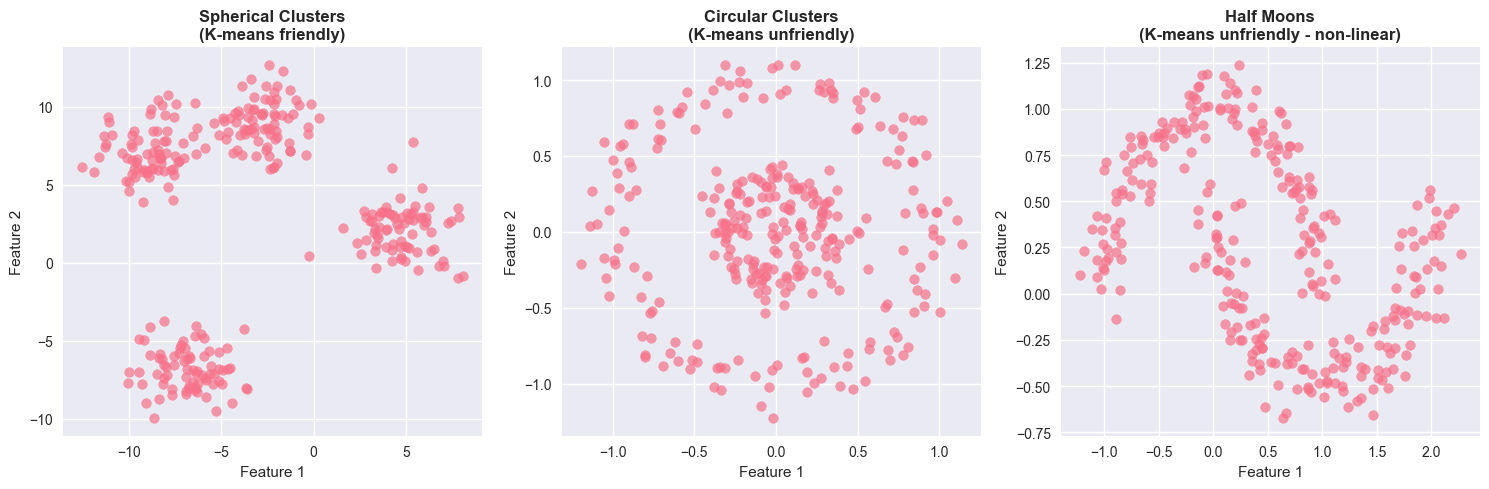

📊 Dataset visualization complete!
💡 Notice how the spherical clusters are perfect for k-means, while circular and half moon clusters present challenges.


In [39]:
# Visualize our datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot spherical clusters
axes[0].scatter(X_spherical[:, 0], X_spherical[:, 1], cmap='viridis', alpha=0.7)
axes[0].set_title('Spherical Clusters\n(K-means friendly)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot circular clusters
axes[1].scatter(X_circles[:, 0], X_circles[:, 1], cmap='viridis', alpha=0.7)
axes[1].set_title('Circular Clusters\n(K-means unfriendly)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Plot half moons
axes[2].scatter(X_moons[:, 0], X_moons[:, 1], cmap='viridis', alpha=0.7)
axes[2].set_title('Half Moons\n(K-means unfriendly - non-linear)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("📊 Dataset visualization complete!")
print("💡 Notice how the spherical clusters are perfect for k-means, while circular and half moon clusters present challenges.")


### Крок 2: Реалізувати кластеризацію K-Means

Давайте реалізуємо кластеризацію k-means та подивимося, як вона працює на наших різних наборах даних:

In [28]:
# Function to perform k-means clustering and evaluate results
def kmeans_analysis(X, true_labels, k, dataset_name):
    """
    Perform k-means clustering and return comprehensive analysis
    """
    print(f"\n🔍 Analyzing {dataset_name} with k={k}")
    print("=" * 50)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    
    # Calculate metrics
    wcss = kmeans.inertia_  # Within-cluster sum of squares
    silhouette_avg = silhouette_score(X, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    
    # Print results
    print(f"📊 Clustering Results:")
    print(f"   • WCSS (Inertia): {wcss:.2f}")
    print(f"   • Silhouette Score: {silhouette_avg:.3f}")
    print(f"   • Calinski-Harabasz Index: {calinski_harabasz:.2f}")
    print(f"   • Davies-Bouldin Index: {davies_bouldin:.3f}")
    
    # Cluster sizes
    unique, counts = np.unique(cluster_labels, return_counts=True)
    print(f"   • Cluster sizes: {dict(zip(unique, counts))}")
    
    return {
        'kmeans': kmeans,
        'labels': cluster_labels,
        'centroids': centroids,
        'wcss': wcss,
        'silhouette': silhouette_avg,
        'calinski_harabasz': calinski_harabasz,
        'davies_bouldin': davies_bouldin
    }

print("✅ K-means analysis function ready!")


✅ K-means analysis function ready!


In [29]:
# Analyze each dataset with k-means
print("🚀 Running K-means analysis on all datasets...")

# Spherical clusters (should work well with k-means)
results_spherical = kmeans_analysis(X_spherical, y_spherical, k=4, dataset_name="Spherical Clusters")

# Circular clusters (k-means will struggle)
results_circles = kmeans_analysis(X_circles, y_circles, k=2, dataset_name="Circular Clusters")

# Half moons (k-means will struggle with non-linear separation)
results_moons = kmeans_analysis(X_moons, y_moons, k=2, dataset_name="Half Moons")


🚀 Running K-means analysis on all datasets...

🔍 Analyzing Spherical Clusters with k=4
📊 Clustering Results:
   • WCSS (Inertia): 1251.35
   • Silhouette Score: 0.691
   • Calinski-Harabasz Index: 1524.60
   • Davies-Bouldin Index: 0.433
   • Cluster sizes: {np.int32(0): np.int64(76), np.int32(1): np.int64(75), np.int32(2): np.int64(75), np.int32(3): np.int64(74)}

🔍 Analyzing Circular Clusters with k=2
📊 Clustering Results:
   • WCSS (Inertia): 112.66
   • Silhouette Score: 0.298
   • Calinski-Harabasz Index: 146.57
   • Davies-Bouldin Index: 1.273
   • Cluster sizes: {np.int32(0): np.int64(152), np.int32(1): np.int64(148)}

🔍 Analyzing Half Moons with k=2
📊 Clustering Results:
   • WCSS (Inertia): 125.19
   • Silhouette Score: 0.479
   • Calinski-Harabasz Index: 429.11
   • Davies-Bouldin Index: 0.784
   • Cluster sizes: {np.int32(0): np.int64(150), np.int32(1): np.int64(150)}


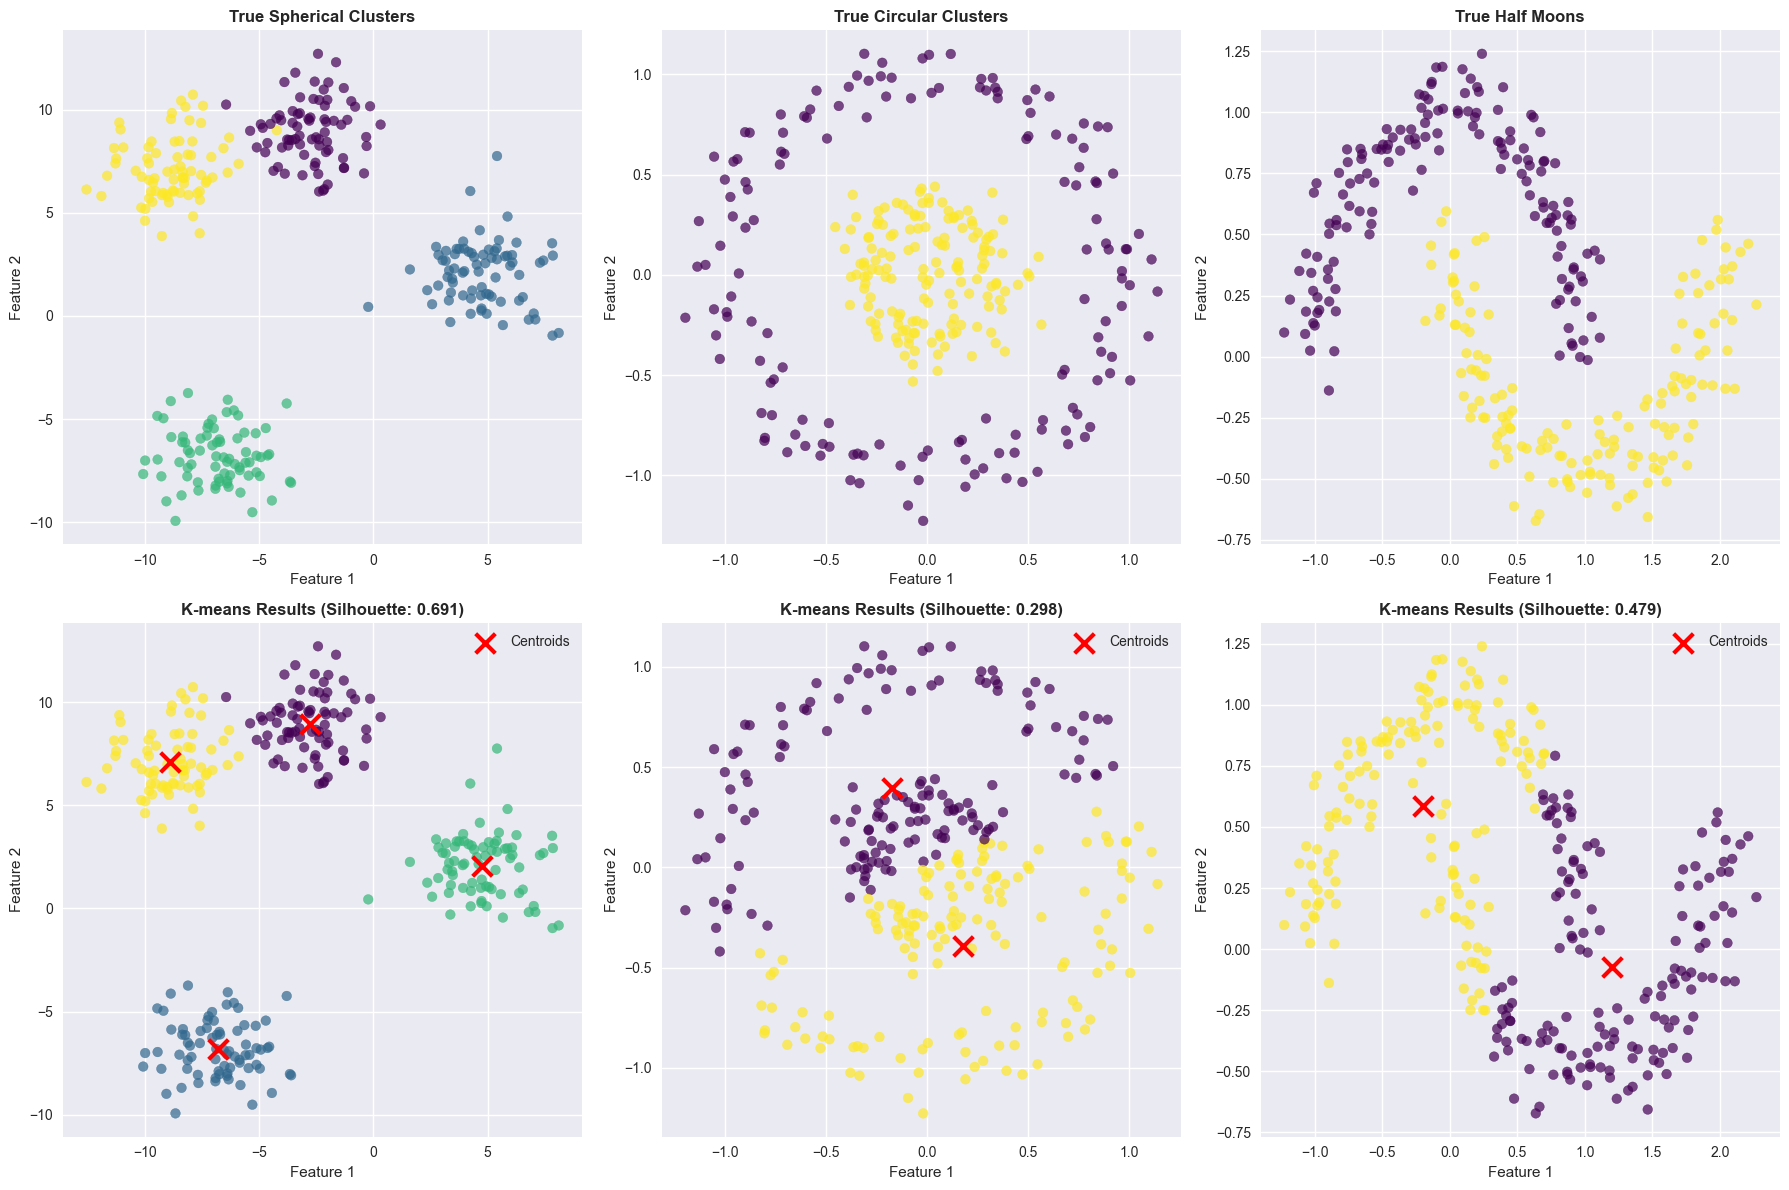

📊 K-means visualization complete!
💡 Notice how k-means works well on spherical clusters but struggles with circular and half moon clusters.


In [30]:
# Visualize k-means results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Top row: True clusters
axes[0, 0].scatter(X_spherical[:, 0], X_spherical[:, 1], c=y_spherical, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('True Spherical Clusters', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')

axes[0, 1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', alpha=0.7)
axes[0, 1].set_title('True Circular Clusters', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')

axes[0, 2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', alpha=0.7)
axes[0, 2].set_title('True Half Moons', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')

# Bottom row: K-means results
axes[1, 0].scatter(X_spherical[:, 0], X_spherical[:, 1], c=results_spherical['labels'], cmap='viridis', alpha=0.7)
axes[1, 0].scatter(results_spherical['centroids'][:, 0], results_spherical['centroids'][:, 1], 
                   c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1, 0].set_title(f'K-means Results (Silhouette: {results_spherical["silhouette"]:.3f})', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
axes[1, 0].legend()

axes[1, 1].scatter(X_circles[:, 0], X_circles[:, 1], c=results_circles['labels'], cmap='viridis', alpha=0.7)
axes[1, 1].scatter(results_circles['centroids'][:, 0], results_circles['centroids'][:, 1], 
                   c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1, 1].set_title(f'K-means Results (Silhouette: {results_circles["silhouette"]:.3f})', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')
axes[1, 1].legend()

axes[1, 2].scatter(X_moons[:, 0], X_moons[:, 1], c=results_moons['labels'], cmap='viridis', alpha=0.7)
axes[1, 2].scatter(results_moons['centroids'][:, 0], results_moons['centroids'][:, 1], 
                   c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1, 2].set_title(f'K-means Results (Silhouette: {results_moons["silhouette"]:.3f})', 
                     fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("📊 K-means visualization complete!")
print("💡 Notice how k-means works well on spherical clusters but struggles with circular and half moon clusters.")


### Крок 3: Вибір оптимальної кількості кластерів

Тепер давайте реалізуємо метод ліктя та аналіз силуету для знаходження оптимальної кількості кластерів:

In [31]:
# Function to find optimal k using elbow method and silhouette analysis
def find_optimal_k(X, max_k=10, dataset_name="Dataset"):
    """
    Find optimal number of clusters using elbow method and silhouette analysis
    """
    print(f"\n🔍 Finding optimal k for {dataset_name}")
    print("=" * 50)
    
    # Range of k values to test
    k_range = range(2, max_k + 1)
    
    # Store metrics
    wcss_values = []
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []
    
    # Test different k values
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate metrics
        wcss_values.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, cluster_labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, cluster_labels))
    
    # Find optimal k based on silhouette score
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
    optimal_k_calinski = k_range[np.argmax(calinski_harabasz_scores)]
    optimal_k_davies = k_range[np.argmin(davies_bouldin_scores)]
    
    print(f"📊 Optimal k based on different metrics:")
    print(f"   • Silhouette Score: k = {optimal_k_silhouette} (score: {max(silhouette_scores):.3f})")
    print(f"   • Calinski-Harabasz: k = {optimal_k_calinski} (score: {max(calinski_harabasz_scores):.2f})")
    print(f"   • Davies-Bouldin: k = {optimal_k_davies} (score: {min(davies_bouldin_scores):.3f})")
    
    return {
        'k_range': list(k_range),
        'wcss': wcss_values,
        'silhouette': silhouette_scores,
        'calinski_harabasz': calinski_harabasz_scores,
        'davies_bouldin': davies_bouldin_scores,
        'optimal_k_silhouette': optimal_k_silhouette,
        'optimal_k_calinski': optimal_k_calinski,
        'optimal_k_davies': optimal_k_davies
    }

print("✅ Optimal k finding function ready!")


✅ Optimal k finding function ready!


In [32]:
# Find optimal k for spherical dataset
optimal_results = find_optimal_k(X_spherical, max_k=8, dataset_name="Spherical Clusters")


🔍 Finding optimal k for Spherical Clusters
📊 Optimal k based on different metrics:
   • Silhouette Score: k = 3 (score: 0.702)
   • Calinski-Harabasz: k = 4 (score: 1524.60)
   • Davies-Bouldin: k = 3 (score: 0.417)


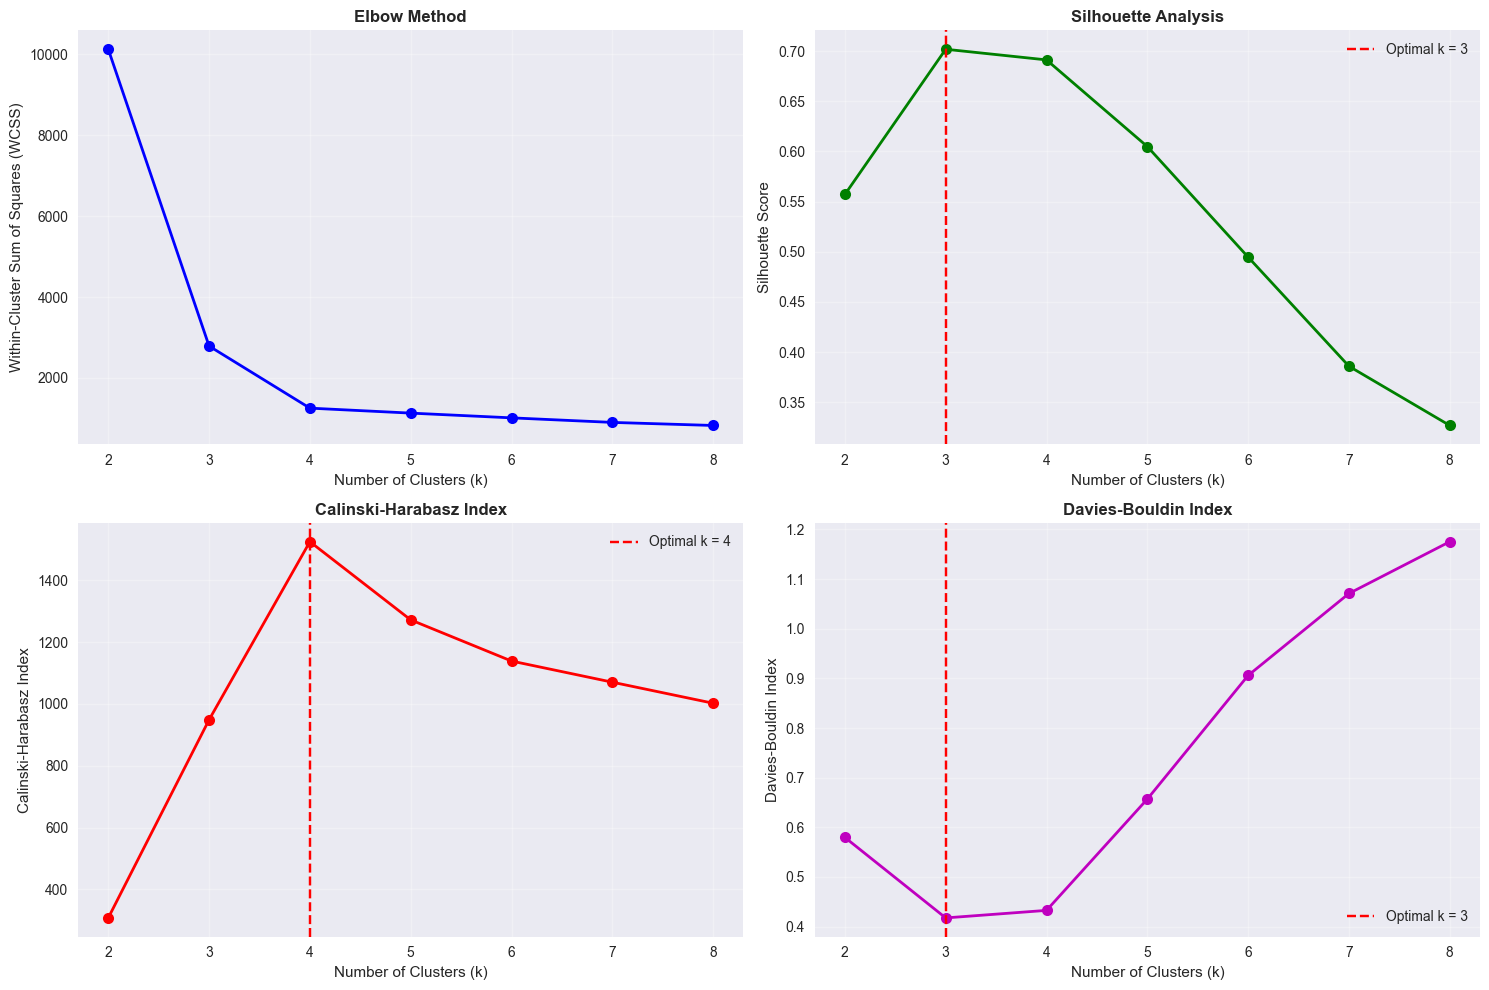

📊 Optimal k analysis complete!
💡 The elbow method looks for the 'elbow' point where WCSS starts to decrease more slowly.
💡 Silhouette analysis finds the k that maximizes the silhouette score.


In [33]:
# Visualize the elbow method and silhouette analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Elbow method (WCSS)
axes[0, 0].plot(optimal_results['k_range'], optimal_results['wcss'], 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Within-Cluster Sum of Squares (WCSS)')
axes[0, 0].set_title('Elbow Method', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Silhouette analysis
axes[0, 1].plot(optimal_results['k_range'], optimal_results['silhouette'], 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Analysis', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=optimal_results['optimal_k_silhouette'], color='red', linestyle='--', 
                   label=f'Optimal k = {optimal_results["optimal_k_silhouette"]}')
axes[0, 1].legend()

# Calinski-Harabasz index
axes[1, 0].plot(optimal_results['k_range'], optimal_results['calinski_harabasz'], 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz Index')
axes[1, 0].set_title('Calinski-Harabasz Index', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axvline(x=optimal_results['optimal_k_calinski'], color='red', linestyle='--', 
                   label=f'Optimal k = {optimal_results["optimal_k_calinski"]}')
axes[1, 0].legend()

# Davies-Bouldin index
axes[1, 1].plot(optimal_results['k_range'], optimal_results['davies_bouldin'], 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(x=optimal_results['optimal_k_davies'], color='red', linestyle='--', 
                   label=f'Optimal k = {optimal_results["optimal_k_davies"]}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("📊 Optimal k analysis complete!")
print("💡 The elbow method looks for the 'elbow' point where WCSS starts to decrease more slowly.")
print("💡 Silhouette analysis finds the k that maximizes the silhouette score.")


### Крок 4: Реалізація K-Medoids з різними алгоритмами

Бібліотека kmedoids надає кілька алгоритмів. Давайте дослідимо різні опції:

In [40]:
# Function to compare different k-medoids algorithms
def compare_kmedoids_algorithms(X, k, dataset_name):
    """
    Compare different k-medoids algorithms available in the kmedoids library
    """
    print(f"\n🔍 Comparing K-medoids algorithms for {dataset_name}")
    print("=" * 70)
    
    # Calculate distance matrix (required by kmedoids library)
    print("📊 Computing distance matrix...")
    distance_matrix = euclidean_distances(X)
    
    # Test different algorithms
    algorithms = {
        'FasterPAM': lambda: kmedoids.fasterpam(distance_matrix, k, random_state=42),
        'FastPAM1': lambda: kmedoids.fastpam1(distance_matrix, k, random_state=42),
        'PAM': lambda: kmedoids.pam(distance_matrix, k, random_state=42)
    }
    
    results = {}
    
    for name, algorithm_func in algorithms.items():
        print(f"\n🎯 Running {name}...")
        try:
            result = algorithm_func()
            labels = result.labels
            medoids = X[result.medoids]
            
            # Calculate metrics
            silhouette = silhouette_score(X, labels)
            calinski_harabasz = calinski_harabasz_score(X, labels)
            davies_bouldin = davies_bouldin_score(X, labels)
            
            results[name] = {
                'result': result,
                'labels': labels,
                'medoids': medoids,
                'medoid_indices': result.medoids,
                'silhouette': silhouette,
                'calinski_harabasz': calinski_harabasz,
                'davies_bouldin': davies_bouldin,
                'loss': result.loss,
                'iterations': result.n_iter
            }
            
            print(f"   ✅ {name} completed in {result.n_iter} iterations")
            print(f"   📊 Loss: {result.loss:.2f}, Silhouette: {silhouette:.3f}")
            
        except Exception as e:
            print(f"   ❌ {name} failed: {str(e)}")
    
    # Print comparison table
    print(f"\n📊 Algorithm Comparison:")
    print(f"{'Algorithm':<12} {'Loss':<10} {'Silhouette':<12} {'Iterations':<12} {'Best Silhouette':<15}")
    print("-" * 70)
    
    best_silhouette = max(results.values(), key=lambda x: x['silhouette'])['silhouette']
    
    for name, data in results.items():
        is_best = "🏆" if data['silhouette'] == best_silhouette else "  "
        print(f"{name:<12} {data['loss']:<10.2f} {data['silhouette']:<12.3f} {data['iterations']:<12} {is_best}")
    
    return results

print("✅ K-medoids algorithms comparison function ready!")


✅ K-medoids algorithms comparison function ready!


In [41]:
# First, let's compare different k-medoids algorithms
kmedoids_algorithms = compare_kmedoids_algorithms(X_spherical, k=4, dataset_name="Spherical Clusters")


🔍 Comparing K-medoids algorithms for Spherical Clusters
📊 Computing distance matrix...

🎯 Running FasterPAM...
   ✅ FasterPAM completed in 2 iterations
   📊 Loss: 545.94, Silhouette: 0.691

🎯 Running FastPAM1...
   ✅ FastPAM1 completed in 7 iterations
   📊 Loss: 545.94, Silhouette: 0.691

🎯 Running PAM...
   ✅ PAM completed in 2 iterations
   📊 Loss: 545.94, Silhouette: 0.691

📊 Algorithm Comparison:
Algorithm    Loss       Silhouette   Iterations   Best Silhouette
----------------------------------------------------------------------
FasterPAM    545.94     0.691        2            🏆
FastPAM1     545.94     0.691        7            🏆
PAM          545.94     0.691        2            🏆


In [42]:
# Function to compare k-means and k-medoids
def compare_kmeans_kmedoids(X, k, dataset_name):
    """
    Compare k-means and k-medoids clustering using the kmedoids library
    """
    print(f"\n🔍 Comparing K-means vs K-medoids for {dataset_name}")
    print("=" * 60)
    
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_centroids = kmeans.cluster_centers_
    
    # Calculate distance matrix for k-medoids (required by kmedoids library)
    print("📊 Computing distance matrix for k-medoids...")
    distance_matrix = euclidean_distances(X)
    
    # K-medoids using the kmedoids library
    print("🎯 Running k-medoids clustering...")
    kmedoids_result = kmedoids.fasterpam(distance_matrix, k, random_state=42)
    kmedoids_labels = kmedoids_result.labels
    kmedoids_medoids = X[kmedoids_result.medoids]  # Get actual data points as medoids
    
    # Calculate metrics for both
    kmeans_metrics = {
        'silhouette': silhouette_score(X, kmeans_labels),
        'calinski_harabasz': calinski_harabasz_score(X, kmeans_labels),
        'davies_bouldin': davies_bouldin_score(X, kmeans_labels),
        'inertia': kmeans.inertia_
    }
    
    kmedoids_metrics = {
        'silhouette': silhouette_score(X, kmedoids_labels),
        'calinski_harabasz': calinski_harabasz_score(X, kmedoids_labels),
        'davies_bouldin': davies_bouldin_score(X, kmedoids_labels),
        'inertia': kmedoids_result.loss  # Total cost from k-medoids
    }
    
    # Print comparison
    print(f"📊 Performance Comparison:")
    print(f"{'Metric':<20} {'K-means':<12} {'K-medoids':<12} {'Winner':<10}")
    print("-" * 60)
    
    for metric in ['silhouette', 'calinski_harabasz']:
        kmeans_val = kmeans_metrics[metric]
        kmedoids_val = kmedoids_metrics[metric]
        winner = "K-means" if kmeans_val > kmedoids_val else "K-medoids"
        print(f"{metric.capitalize():<20} {kmeans_val:<12.3f} {kmedoids_val:<12.3f} {winner:<10}")
    
    for metric in ['davies_bouldin', 'inertia']:
        kmeans_val = kmeans_metrics[metric]
        kmedoids_val = kmedoids_metrics[metric]
        winner = "K-means" if kmeans_val < kmedoids_val else "K-medoids"
        print(f"{metric.capitalize():<20} {kmeans_val:<12.3f} {kmedoids_val:<12.3f} {winner:<10}")
    
    print(f"\n💡 K-medoids used {kmedoids_result.n_iter} iterations to converge")
    print(f"💡 Medoid indices: {kmedoids_result.medoids}")
    
    return {
        'kmeans': {'labels': kmeans_labels, 'centers': kmeans_centroids, 'metrics': kmeans_metrics},
        'kmedoids': {'labels': kmedoids_labels, 'centers': kmedoids_medoids, 'metrics': kmedoids_metrics, 'medoid_indices': kmedoids_result.medoids}
    }

print("✅ Comparison function ready!")


✅ Comparison function ready!


In [45]:
comparison_results = compare_kmeans_kmedoids(X_moons, k=2, dataset_name="Half Moons Clusters")


🔍 Comparing K-means vs K-medoids for Half Moons Clusters
📊 Computing distance matrix for k-medoids...
🎯 Running k-medoids clustering...
📊 Performance Comparison:
Metric               K-means      K-medoids    Winner    
------------------------------------------------------------
Silhouette           0.479        0.481        K-medoids 
Calinski_harabasz    429.114      428.194      K-means   
Davies_bouldin       0.784        0.784        K-medoids 
Inertia              125.189      182.639      K-means   

💡 K-medoids used 2 iterations to converge
💡 Medoid indices: [ 52 174]


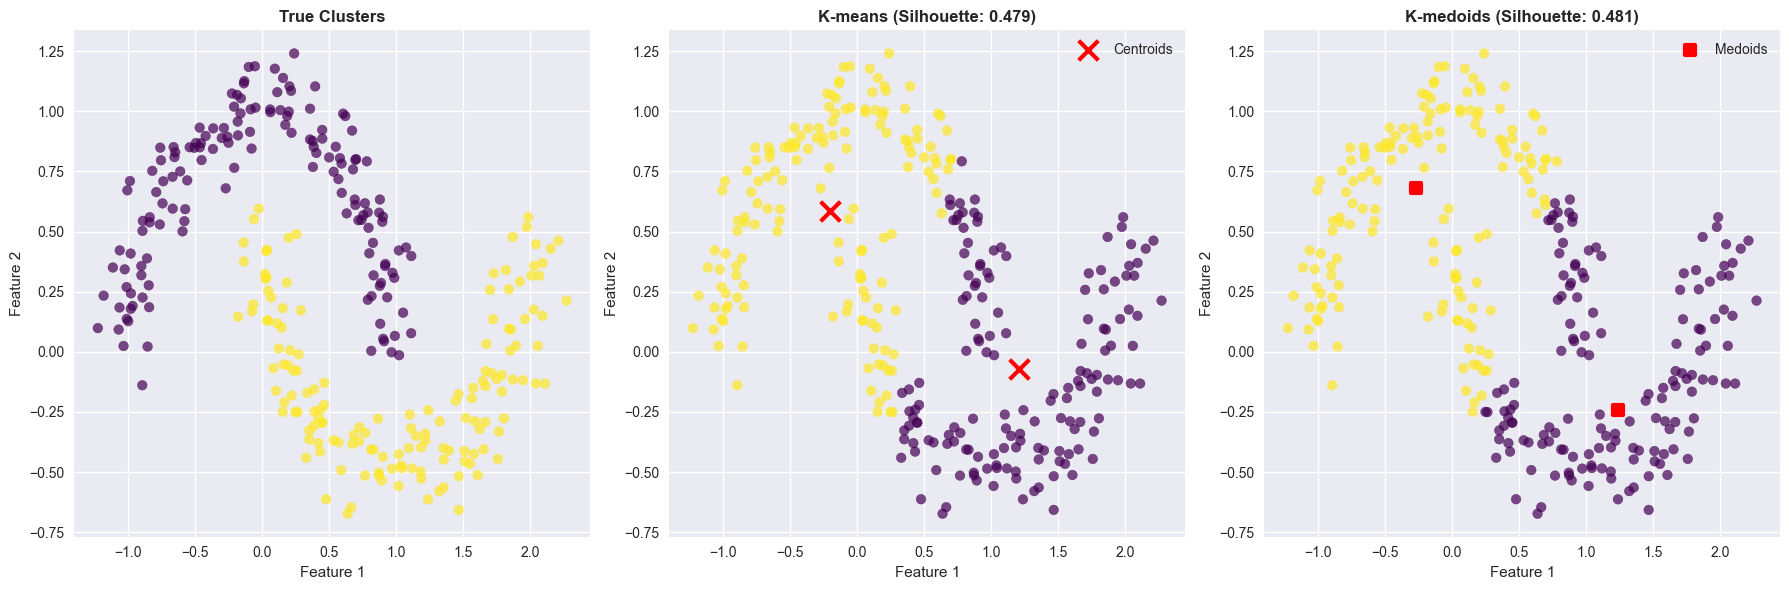

📊 K-means vs K-medoids comparison complete!
💡 Notice that centroids (X) may not be actual data points, while medoids (squares) are always real data points.
💡 Both methods should perform similarly on well-separated spherical clusters.


In [46]:
# Visualize k-means vs k-medoids comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# True clusters
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', alpha=0.7)
axes[0].set_title('True Clusters', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# K-means results
axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=comparison_results['kmeans']['labels'], cmap='viridis', alpha=0.7)
axes[1].scatter(comparison_results['kmeans']['centers'][:, 0], comparison_results['kmeans']['centers'][:, 1], 
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[1].set_title(f'K-means (Silhouette: {comparison_results["kmeans"]["metrics"]["silhouette"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

# K-medoids results
axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=comparison_results['kmedoids']['labels'], cmap='viridis', alpha=0.7)
axes[2].scatter(comparison_results['kmedoids']['centers'][:, 0], comparison_results['kmedoids']['centers'][:, 1], 
                c='red', marker='s', s=50, linewidths=3, label='Medoids')
axes[2].set_title(f'K-medoids (Silhouette: {comparison_results["kmedoids"]["metrics"]["silhouette"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].legend()

plt.tight_layout()
plt.show()

print("📊 K-means vs K-medoids comparison complete!")
print("💡 Notice that centroids (X) may not be actual data points, while medoids (squares) are always real data points.")
print("💡 Both methods should perform similarly on well-separated spherical clusters.")
